In [1]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
DATA_DIR = path.join('..', 'data')

In [2]:
RESULT_HEADER = ['Init_station','Init_time', 'Tick_length','Init_count',
                 'Travel_period','Count_type']
INDEX = ['Init_station','Init_time','Init_count','Count_type']
results = pd.DataFrame(np.load('stations_times.npy'))
timesteps = len(results.columns) - len(RESULT_HEADER)
results.columns = RESULT_HEADER + list(range(timesteps))
results.drop(columns=['Travel_period', 'Tick_length'], inplace=True)
results.replace({'Count_type': {0.0: 'S', 1.0: 'I', 2.0: 'R', 3.0: 'N'}}, inplace=True)
results.set_index(INDEX, inplace=True)
results.head()

0             1     \
Init_station Init_time Init_count Count_type                            
0.0          3.0       1.0        S           7947054.0  7.947054e+06   
                                  I                 1.0  1.006943e+00   
                                  R                 0.0  1.388889e-02   
                                  N           7947055.0  7.947055e+06   
             99.0      1.0        S           7947054.0  7.947054e+06   

                                                      2             3     \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           7.947054e+06  7.947054e+06   
                                  I           1.013934e+00  1.020973e+00   
                                  R           2.787421e-02  4.195662e-02   
                                  N           7.947055e+06  7.947055e+06   
             99.0      1.0        S           7.947054e+06  7.947054e+06   

                                                      4             5     \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           7.947054e+06  7.947054e+06   
                                  I           1.028062e+00  1.035199e+00   
                                  R           5.613680e-02  7.041544e-02   
                                  N           7.947055e+06  7.947055e+06   
             99.0      1.0        S           7.947054e+06  7.947054e+06   

                                                      6             7     \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           7.947054e+06  7.947054e+06   
                                  I           1.042386e+00  1.049623e+00   
                                  R           8.479320e-02  9.927079e-02   
                                  N           7.947055e+06  7.947055e+06   
             99.0      1.0        S           7.947054e+06  7.947054e+06   

                                                      8             9     \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           7.947054e+06  7.947054e+06   
                                  I           1.056910e+00  1.064248e+00   
                                  R           1.138489e-01  1.285282e-01   
                                  N           7.947055e+06  7.947055e+06   
             99.0      1.0        S           7.947054e+06  7.947054e+06   

                                                  ...               5880  \
Init_station Init_time Init_count Count_type      ...                      
0.0          3.0       1.0        S               ...       3.355473e+06   
                                  I               ...       5.017454e-01   
                                  R               ...       4.591581e+06   
                                  N               ...       7.947055e+06   
             99.0      1.0        S               ...       3.355683e+06   

                                                      5881          5882  \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           3.355473e+06  3.355473e+06   
                                  I           5.017454e-01  5.017454e-01   
                                  R           4.591581e+06  4.591581e+06   
                                  N           7.947055e+06  7.947055e+06   
             99.0      1.0        S           3.355683e+06  3.355683e+06   

                                                      5883          5884  \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           3.355473e+06  3.355473e+06   
                                  I           5.017454e-01  5.017454e-01   
                                  R  

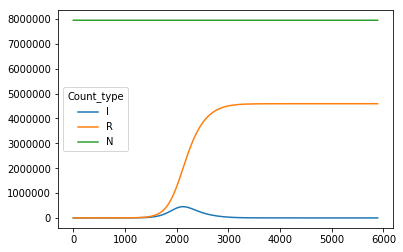

In [3]:
results.xs((0,3,1), level=('Init_station','Init_time','Init_count')).T.drop(columns='S').plot()

In [4]:
filtered=results.xs((1, 'I'), level=('Init_count', 'Count_type')).fillna(0)
filtered_R=results.xs((1, 'R'), level=('Init_count', 'Count_type')).fillna(0)

In [5]:
peaks = pd.concat([filtered.T.idxmax(), filtered.T.max(), filtered_R.T.max()], axis=1)
peaks.columns = ['Time', 'Value', 'Total']
peaks['Time'] = peaks['Time'] / 24

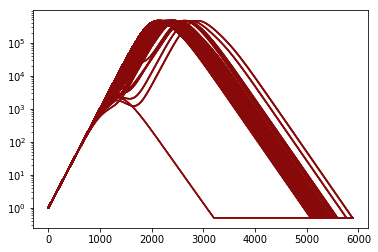

In [6]:
filtered.T.plot(legend=None, color='#870909', logy=True)

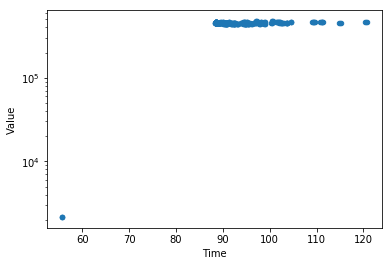

In [7]:
peaks.plot.scatter('Time', 'Value', logy=True)

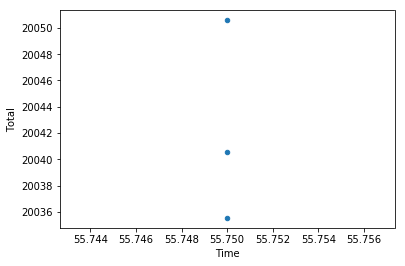

In [8]:
peaks[peaks['Total'] < 3e6].plot.scatter('Time', 'Total')

In [10]:
group_1 = peaks[peaks['Time'] < 40]
set(group_1.index.get_level_values('Init_station'))

set()

In [11]:
peaks[(peaks['Time'] > 40) & (peaks['Time'] < 68)].describe()

,Time,Value,Total
count,3.00,3.000000,3.000000
mean,55.75,2162.753020,20042.230251
std,0.00,0.813229,7.646931
min,55.75,2162.004770,20035.555460
25%,55.75,2162.320279,20038.058509
50%,55.75,2162.635788,20040.561557
75%,55.75,2163.127145,20045.567647
max,55.75,2163.618503,20050.573736


In [12]:
peaks[(peaks['Time'] > 40) & (peaks['Time'] < 68)].sample(1)

,,Time,Value,Total
Init_station,Init_time,,,
229.0,123.0,55.75,2162.635788,20040.561557


In [13]:
g2_counts=peaks[(peaks['Time'] > 40) & (peaks['Time'] < 68)].reset_index().groupby('Init_station').count()
g2_counts[g2_counts['Total'] != 5]

,Init_time,Time,Value,Total
Init_station,,,,
229.0,3,3,3,3


In [14]:
peaks[(peaks['Time'] > 68) & (peaks['Time'] < 90)].describe()

,Time,Value,Total
count,958.000000,958.000000,9.580000e+02
mean,88.551105,453617.996160,4.592269e+06
std,0.168839,2737.818353,1.273269e+03
min,88.416667,444695.287696,4.586773e+06
25%,88.500000,451933.775184,4.591739e+06
50%,88.500000,454339.090048,4.592733e+06
75%,88.500000,455376.248296,4.593139e+06
max,89.958333,466300.537025,4.594815e+06


In [15]:
peaks[(peaks['Time'] > 68) & (peaks['Time'] < 90)].reset_index().groupby('Init_station').count()

,Init_time,Time,Value,Total
Init_station,,,,
0.0,3,3,3,3
2.0,3,3,3,3
3.0,3,3,3,3
4.0,3,3,3,3
5.0,3,3,3,3
6.0,3,3,3,3
7.0,3,3,3,3
8.0,3,3,3,3
9.0,3,3,3,3


In [16]:
peaks[peaks['Time'] > 90]

Time          Value         Total
Init_station Init_time                                         
1.0          3.0         95.541667  447837.229968  4.588649e+06
             99.0        95.583333  447733.660271  4.588568e+06
             123.0       95.708333  447666.928628  4.588537e+06
19.0         3.0        103.666667  456556.129594  4.589442e+06
             99.0       103.750000  456324.149014  4.589357e+06
             123.0      103.666667  456458.578071  4.589415e+06
22.0         3.0         94.250000  447164.600211  4.588318e+06
             99.0        94.291667  447018.900646  4.588228e+06
             123.0       94.416667  446935.945344  4.588180e+06
24.0         3.0        114.833333  454530.109839  4.611968e+06
             99.0       115.208333  454233.950343  4.611854e+06
             123.0      115.083333  454346.842211  4.611896e+06
28.0         3.0         91.500000  446149.304044  4.587045e+06
             99.0        91.625000  445808.090852  4.586842e+06
             123.0       91.541667  445948.141089  4.586920e+06
40.0         3.0        111.083333  460921.541100  4.586616e+06
             99.0       111.416667  460684.994834  4.586421e+06
             123.0      111.250000  460775.485757  4.586492e+06
46.0         3.0         90.708333  446414.403842  4.586649e+06
             99.0        90.791667  446030.640623  4.586424e+06
             123.0       90.833333  446010.414306  4.586400e+06
49.0         3.0         94.208333  447190.429922  4.587416e+06
             99.0        94.208333  446953.546767  4.587240e+06
             123.0       94.250000  446933.336377  4.587218e+06
58.0         3.0         90.125000  443332.253863  4.584444e+06
             99.0        90.166667  443113.130401  4.584304e+06
             123.0       90.166667  443109.252356  4.584315e+06
59.0         3.0        101.666667  459753.526830  4.589800e+06
             99.0       101.791667  459661.115016  4.589690e+06
             123.0      101.875000  459579.602509  4.589681e+06
...                            ...            ...           ...
345.0        3.0         90.208333  446429.254776  4.586665e+06
             99.0        90.333333  445984.734437  4.586367e+06
             123.0       90.333333  445975.801424  4.586353e+06
347.0        3.0         91.833333  440229.834602  4.584301e+06
             99.0        91.833333  440098.343690  4.584206e+06
             123.0       91.875000  440010.665195  4.584175e+06
352.0        3.0        104.458333  457979.365661  4.585529e+06
             99.0       104.583333  457931.427303  4.585443e+06
             123.0      104.625000  457804.360543  4.585387e+06
354.0        3.0         98.833333  438209.752112  4.582464e+06
             99.0        98.958333  437958.072399  4.582283e+06
             123.0       99.083333  437931.183192  4.582271e+06
356.0        3.0         94.333333  437820.098242  4.581722e+06
             99.0        94.458333  437683.104845  4.581617e+06
             123.0       94.541667  437465.398200  4.581466e+06
360.0        3.0         90.541667  441769.123720  4.582999e+06
             99.0        90.541667  441838.635960  4.583047e+06
             123.0       90.500000  441867.041991  4.583068e+06
365.0        3.0         97.125000  448760.429096  4.589226e+06
             99.0        97.041667  448979.808391  4.589325e+06
             123.0       97.000000  449060.298206  4.589360e+06
368.0        3.0         98.041667  464191.535988  4.583306e+06
             99.0        98.166667  464192.797627  4.583140e+06
             123.0       98.125000  464087.324907  4.583185e+06
377.0        3.0         94.583333  463853.859507  4.590596e+06
             99.0        94.708333  463611.016494  4.590459e+06
             123.0       94.750000  463679.422329  4.590470e+06
392.0        3.0         94.708333  438532.046148  4.582023e+06
             99.0        94.875000  438269.524216  4.581823e+06
             123.0       94.916667  438222.696564  4.581796e+0

In [17]:
results.xs((82,60,1), level=('Init_station','Init_time','Init_count')).drop(columns=range(5000,7000))

KeyError: 60.0

In [ ]:
I_series = results.xs('I', level='Count_type').fillna(0)
all_peaks = pd.concat([I_series.T.idxmax(), I_series.T.max(), I_series.T.max()], axis=1)
all_peaks.columns = ['Time', 'Value', 'Total']
all_peaks['Time'] = all_peaks['Time'] / 24
all_peaks.plot.scatter('Time', 'Value', logy=True)

# Minor epidemic group

In [ ]:
group_1 = all_peaks[all_peaks['Value'] < 100]
set(group_1.index.get_level_values('Init_station'))

In [ ]:
move_data = pd.read_csv(path.join(DATA_DIR, 'journey_count.csv'))
move_data.head()

In [ ]:
STATION_LOOKUP = {
    i: name for i, name in enumerate(move_data['Start station'].unique())
}

In [ ]:
station_names=set(STATION_LOOKUP[i] for i in group_1.index.get_level_values('Init_station'))
station_names

## Hypothesis: initial pop related to peak

In [ ]:
from simulate import get_pop_data
pop_data = get_pop_data()[0]
pop_data.set_index('Station', inplace=True)
pop_data.head()

In [ ]:
pop_data.loc['Aldgate']['Station population']

In [ ]:
all_peaks['Station_name'] = [STATION_LOOKUP[s] for s in all_peaks.reset_index()['Init_station']]
all_peaks['Station_pop'] = all_peaks['Station_name'].apply(lambda s: pop_data.loc[s]['Station population'])
all_peaks.head()

In [ ]:
all_peaks[all_peaks['Value'] < 3e5].plot.scatter('Station_pop', 'Value')